In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Task-1 (Reading the text and text preprocessing)

In [2]:
df=pd.read_excel("Movies_input.xlsx") #input is read.

In [3]:
df.head()

,Movie Names,Movie Description
0,Kshanam,"""Kshanam"" is a gripping Telugu thriller that t..."
1,Evaru,"Directed by Venkat Ramji, ""Evaru"" is a Telugu ..."
2,Goodachari,"""Goodachari"" is a Telugu spy thriller directed..."
3,Awe,"""Awe!"" is a unique Telugu thriller that blends..."
4,Anukshanam,"Directed by Ram Gopal Varma, ""Anukshanam"" is a..."


In [4]:
df_description = df["Movie Description"]

In [5]:
num_of_documents = df_description.shape[0]
print(num_of_documents)

15


In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_description)  # ref link for getting tf-idf matrix for a dataframe :- https://www.includehelp.com/python/how-to-get-tfidf-with-pandas-dataframe.aspx

In [7]:
print(vectorizer.get_feature_names_out())


['abhinav' 'abhiram' 'abhishek' 'abilities' 'ability' 'about' 'accidental'
 'acclaim' 'accused' 'action' 'actions' 'activities' 'actor' 'actors'
 'adah' 'add' 'adding' 'additionally' 'adds' 'adivi' 'adrenaline'
 'adulthood' 'adults' 'adventure' 'adversaries' 'after' 'against' 'agency'
 'ages' 'aggarwal' 'aggressive' 'agility' 'aithe' 'ajay' 'akkineni' 'all'
 'also' 'ambiguity' 'ambitions' 'ambitious' 'amidst' 'among' 'an'
 'anasuya' 'and' 'another' 'antagonist' 'anukshanam' 'apart' 'appeal'
 'appealing' 'appeals' 'approach' 'approaches' 'are' 'around' 'arranging'
 'as' 'aspects' 'aspirations' 'aspires' 'aspiring' 'assigned' 'at'
 'athili' 'atmosphere' 'audacious' 'audience' 'audiences' 'authenticity'
 'aversion' 'away' 'awe' 'babu' 'balanced' 'balances' 'battle' 'be'
 'became' 'become' 'becomes' 'before' 'begin' 'believable' 'beloved'
 'bendre' 'benefits' 'best' 'between' 'bharadwaj' 'bharani' 'bhascker'
 'bhaskar' 'blend' 'blends' 'blurred' 'bommarillu' 'both' 'brahmanandam'
 'brillia

In [8]:
print(type(X))

<class 'scipy.sparse._csr.csr_matrix'>


In [9]:
print("Result",X.toarray())

Result [[0.         0.         0.         ... 0.         0.05269869 0.        ]
 [0.         0.         0.         ... 0.         0.09804094 0.        ]
 [0.         0.         0.         ... 0.03681946 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.1034359  ... 0.         0.         0.        ]]


In [10]:
print(X.shape)

(15, 901)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False) # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#examples-using-sklearn-preprocessing-standardscaler referred this link which is a Scikit-learn module that standardizes with subtracting mean and dividing by standard deviation of feature x.
X_standardized = scaler.fit_transform(X)  #We use with_mean= False for sparse matriz because of the reason in this link :- https://stackoverflow.com/questions/52008548/python-running-into-x-test-y-test-fit-errors which states that If True, then the data should be centered before scaling it. However, this approach is not suitable for sparse matrices because centering them involves creating a dense matrix, which in many typical scenarios, could be too large to be stored in memory, leading to an error.

In [12]:
print("Result",X_standardized.toarray())

Result [[0.         0.         0.         ... 0.         1.83307639 0.        ]
 [0.         0.         0.         ... 0.         3.41026553 0.        ]
 [0.         0.         0.         ... 0.97264884 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         4.00891863 ... 0.         0.         0.        ]]


# Task-2 (PCA Implementation)

In [13]:
from sklearn.decomposition import PCA
pca = PCA() # without mentioning any components

In [14]:
X_standardized_array = X_standardized.toarray() # we can't apply directly to sparse matrix there fore it must be converted to array first.



In [15]:
X_pca = pca.fit(X_standardized_array) #only fitting the model without transforming.

In [16]:
print(X_pca)

PCA()


### Exploring various attributes and methods of traditional PCA.

In [17]:
components = pca.components_
print(components) # you will be getting default components as initially none is given.
print(len(components))

[[ 0.03793537 -0.00329927 -0.00353543 ...  0.07089891 -0.07376078
   0.03793537]
 [ 0.02654992 -0.0294384  -0.00908518 ...  0.06015757  0.04340838
   0.02654992]
 [-0.01384369  0.06305625 -0.01033069 ... -0.01123276 -0.02687195
  -0.01384369]
 ...
 [ 0.0016166  -0.00859262 -0.06906818 ... -0.01795566  0.0106269
   0.0016166 ]
 [ 0.00127984 -0.00109929 -0.01920692 ...  0.00744939  0.00327445
   0.00127984]
 [-0.29923851 -0.31581922  0.36878862 ... -0.00572123 -0.00226313
   0.00303741]]
15


In [18]:
pca_mean = pca.mean_
print(len(pca_mean)) # this attribute is the mean of every feature in original data calculated during fitting.
print(pca_mean)

901
[0.26726124 0.26726124 0.26726124 0.26726124 0.39005346 0.26726124
 0.26726124 0.38886585 0.26726124 0.58581415 0.26726124 0.26726124
 0.4988151  0.38291121 0.26726124 0.67115994 0.6024153  0.26726124
 0.80571395 0.49950604 0.26726124 0.26726124 0.39193505 0.26726124
 0.26726124 0.26726124 0.59898114 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.39182204
 0.71650479 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.76166536 0.26726124 6.16016222 0.26726124 0.26726124 0.26726124
 2.36189092 0.39129029 0.26726124 0.26726124 0.26726124 0.26726124
 1.48531169 0.69616543 0.26726124 1.89435039 0.26726124 0.39193505
 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124 0.26726124
 0.26726124 1.47288834 0.26726124 0.60085273 0.26726124 0.39038744
 0.26726124 0.39210361 0.26726124 0.26726124 0.26726124 0.39223227
 0.26726124 0.26726124 0.35633232 0.26726124 0.26726124 0.26726124
 0.26726124 0.26726124 0.39193671 0.26726124 0.59810503 0.

In [19]:
singular_values = pca.singular_values_
print(singular_values)  #The singular values provide information about the relative importance of each principal component. Specifically, they represent the standard deviation of the data projected onto each principal component.

[3.72725620e+01 3.46628763e+01 3.39624234e+01 3.26042079e+01
 3.23851649e+01 3.18436490e+01 3.14534463e+01 3.13757024e+01
 3.04151483e+01 2.96588580e+01 2.83312293e+01 2.72932142e+01
 2.63099158e+01 2.50333941e+01 3.66607925e-14]


In [20]:
features_count = pca.n_features_
print(features_count) #the orginal 2nd attribute of X.shape

901


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


#### Calculating explained variance ratio

In [21]:
exp_var_pca = pca.explained_variance_ratio_

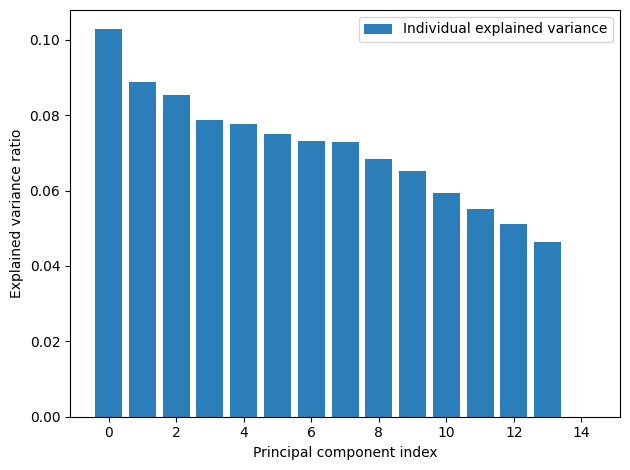

In [22]:
import matplotlib.pyplot as plt
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.95, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')                #Link refered :- https://vitalflux.com/pca-explained-variance-concept-python-example/
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Implementing another PCA.

In [23]:
# So because of below reason I am selecting 3 because we need high explained variance ratio for less information loss in lower dimensions due to that my k here is 3.
other_pca = PCA(n_components=3) #because of below reason.


In [24]:
X_standardized_array = X_standardized.toarray() # we can't apply directly to sparse matrix there fore it must be converted to array first.
other_X_pca = other_pca.fit(X_standardized_array) #only fitting with 3 components not applying reduction.

In [25]:
print(other_X_pca)

PCA(n_components=3)


## Reason for k=3 :- From the bar plot there is a steep decrease at 3 and 8 so according to here :- https://statisticsglobe.com/choose-optimal-number-components-pca in section 2.3 we need to see the elbow point because after this point any extra pca components are not necessary as they have even less explained variance ratio.

### Exploring SparsePCA

>As tf-idf matrix is sparse matrix there is this PCA which is much more suitable if sparcity is concerened.



In [26]:
from sklearn.decomposition import SparsePCA
sparce_pca = SparsePCA()  #without mentioning any components.

In [27]:
X_standardized_array = X_standardized.toarray() # we can't apply directly to sparse matrix there fore it must be converted to array first.
X_sparce_pca = sparce_pca.fit(X_standardized_array)

In [28]:
print(X_sparce_pca)

SparsePCA()


#### As SparsePca consider sparsity their principal components are not orthogonal, therefore we should calculate explained variance ratio through eigen values and eigen vectors which are prohibited in this assignment. Also I am not considering sparsity so throughout this assignemnt I will be sticking to normal PCA.

## Task-3 (Projection and reconstruction on correlation matrix)

In [29]:
pca = PCA(n_components=3)
X_standardized_array= X_standardized.toarray()


X_dim_reduced = pca.fit_transform(X_standardized_array)   #reduced to 3 features


In [30]:
X_reconstructed = pca.inverse_transform(X_dim_reduced) #using inbuilt inverse_transform function reconstructed the array.

In [31]:
import numpy as np
mean = np.mean(X_reconstructed)
std = np.std(X_reconstructed)
X_fully_reconstructed = X_reconstructed* std + mean #According to slides, This step is needed for fully reconstruction as it is destandardization.

In [32]:
#print(type(X_reconstructed))

In [33]:
print(X_fully_reconstructed.shape)

(15, 901)


In [34]:
#print(type(X_standardized_array))

In [35]:
#print(X_Corr.shape)

In [36]:
import numpy as np
mse = np.sum((X_standardized_array - X_fully_reconstructed) ** 2, axis=1).mean()    #Actually X_Standardized is orginal tf-idf matrix but for fitting we used X_standardized_array and that will be considered as orignal features here.
#and link referred here is :- https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn

In [37]:
print(mse)

767.848875786453


### Generating a lineplot for MSE of reconstruction and original features.

In [38]:
mse_values=[]
for k in range(1,15):
  pca = PCA(n_components=k)                          #application of pca as above.
  X_standardized_array= X_standardized.toarray()
                       # Here I have applied pca and reconstruction and de standardization and finally calculated mse for k in range 1 to 15 to get good analysis of bar plot and line plot.
  X_dim_reduced = pca.fit_transform(X_standardized_array)

  X_reconstructed = pca.inverse_transform(X_dim_reduced)

  mean = np.mean(X_reconstructed)
  std = np.std(X_reconstructed)                          # destandardization
  X_fully_reconstructed = X_reconstructed* std + mean


  mse = np.sum((X_standardized_array - X_fully_reconstructed) ** 2, axis=1).mean() #mse calculation for each pca component.
  mse_values.append(mse)



In [39]:
principal_components =[]
for i in range(1,15):
  principal_components.append(i)

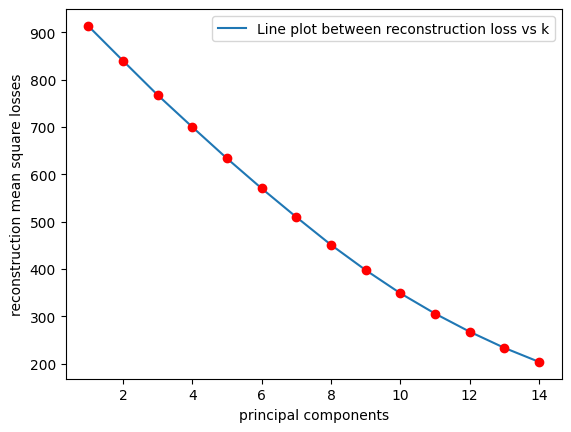

In [40]:
plt.plot(principal_components, mse_values, linestyle='-')
plt.plot(principal_components, mse_values,'ro')
plt.xlabel("principal components")               #plotting red labels for each principal components, reconstruction mse losses in the graph.
plt.ylabel("reconstruction mean square losses")
plt.legend(["Line plot between reconstruction loss vs k"])
plt.show()

### Reason for validity of my choice of k with this line plot.
The reason is :- From the bar plot I have chosen k as a elbow point meaning after this values we will get only less explained variance ratio. So my choice of k is to capture maximum variance from original data which naturally has very high reconstruction mse due to high variance. As more and more principal components are being added the variance in barplot decreases meaning explained variance ratio decreases implying more correct original data will be captured resulting lower mses. So the downward line plot of mses is correct. You can check this link which had observed the same line plot nature of reconstruction mses for pca of images . which had explained very clearly.
link :- https://medium.com/@pranjallk1995/pca-for-image-reconstruction-from-scratch-cf4a787c1e36

## Task-4 (Interpretation of results)

### Effects of Standardization and De-standardization:

Standardization: Standardization is considered crucial in PCA, as it ensures that all features (in my case, the TF-IDF values for different terms in the movie descriptions) have the same scale. This results in the prevention of any single feature dominating the principal components solely because of its scale. By standardizing, it is ensured that the PCA analysis relies on the variances and covariances between the terms, rather than their absolute values. This is particularly important when working with text data, as term frequencies can vary widely.

De-standardization: After dimensionality reduction with PCA and subsequent de-standardization, the data is effectively reconstructed in the original scale. This step is vital when seeking to interpret and visualize results within the context of the original data. It facilitates an understanding of how the principal components relate to the original terms and descriptions.

### Choice of 'k' (Number of Principal Components):

Balancing Information Retention and Dimensionality Reduction: The selection of 'k' determines the quantity of principal components retained post-PCA. A smaller 'k' reduces dimensionality but potentially leads to information loss, whereas a larger 'k' retains more information but offers limited dimensionality reduction. A trade-off is inherent, and the choice made should be contingent on the specific objectives of the analysis.

In my case, 'k=3' was chosen based on the explained variance ratio plot. Consequently, the top 3 principal components were retained, collectively explaining a substantial proportion of the variance within the TF-IDF data. This choice seems to strike a balance between dimensionality reduction and information retention.

In [41]:
terms = vectorizer.get_feature_names_out()

In [42]:
print(type(terms))

<class 'numpy.ndarray'>


In [43]:
terms_list = terms.tolist()

In [44]:
def extract_top_terms(pca_components, k):
    top_terms_indices = np.argsort(np.abs(pca_components))[:, ::-1][:k]  #link referred :- https://www.geeksforgeeks.org/numpy-argsort-in-python/
    return top_terms_indices

# np.abs(pca_components): Calculates the absolute values of the elements in the pca_components array. This is done to ensure that both positive and negative values contribute to sorting. and np.argsort(...): Returns the indices that would sort the np.abs(pca_components) array in ascending order along each row. The result is a 2D array where each row contains the indices that would sort the corresponding row of pca_components in ascending order.
#[:, ::-1]: This part reverses the order of the indices along each row. It effectively sorts the indices in descending order, ensuring that the terms with the highest absolute values come first.
#[:k]: Finally, this part selects the top k indices for each row, effectively giving you the indices of the top k terms for each principal component.

In [45]:
pca = PCA(n_components=3)
X_standardized_array= X_standardized.toarray()
X_cache = pca.fit(X_standardized_array)

In [46]:
pca_components = pca.components_ #from above explained attributes.
k=3

top_terms_indices = extract_top_terms(pca_components, 3)


In [47]:
print(pca_components.shape)

(3, 901)


In [48]:
print(top_terms_indices)

[[769 363 651 ... 544 828 654]
 [827  16 807 ...  54 303 373]
 [774 825  92 ... 297  80 889]]


In [49]:
top_terms_lists = [[terms_list[i] for i in row] for row in top_terms_indices]
                                                   #as top_terms_indices are list of lists.
# Print the top terms lists
for i, top_terms_list in enumerate(top_terms_lists):
    print(f"Top terms for component {i + 1}: {top_terms_list}")

Top terms for component 1: ['suspense', 'heart', 'relatable', 'values', 'cinematography', 'production', 'sesh', 'adivi', 'benefits', 'secrets', 'your', 'thriller', 'edge', 'seat', 'young', 'you', 'sharma', 'crafted', 'both', 'dreams', 'including', 'adults', 'essence', 'feel', 'aspirations', 'good', 'celebrates', 'strong', 'comedy', 'must', 'twists', 'unexpected', 'other', 'importance', 'chemistry', 'choices', 'endearing', 'be', 'they', 'make', 'until', 'maintained', 'guessing', 'summary', 'keeps', 'bhascker', 'tharun', 'dhaassyam', 'its', 'who', 'performances', 'watch', 'from', 'supporting', 'meeting', 'pelli', 'following', 'spend', 'ambitions', 'resonates', 'choopulu', 'this', 'ambitious', 'india', 'couple', 'became', 'chitra', 'decide', 'defies', 'devarakonda', 'developed', 'pretend', 'introduces', 'introspection', 'accidental', 'struggles', 'during', 'new', 'yet', 'encourages', 'driven', 'easygoing', 'aspiring', 'passions', 'light', 'us', 'career', 'goals', 'pursue', 'however', 'wav

In [50]:
# Top 3 terms as a whole are :-
term_frequency ={}
for x in terms_list:
  if x not in term_frequency :
    term_frequency[x] =1
  else:
    term_frequency[x]+=1


In [51]:
reverse_dict = dict(sorted(term_frequency.items(), key=lambda item: item[1], reverse=True))

In [52]:
cache=[]
for x in reverse_dict:
  cache.append(x)

print("the top most 3 terms all over the data are :-")
for i in range(0,3):
  print(cache[i])

the top most 3 terms all over the data are :-
abhinav
abhiram
abhishek


### Interpretation of top k terms associated with each component:-  
After exploring the terms I feel these terms appear to be related to movie reviews or descriptions of movies. Component 1 seems to emphasize themes related to suspense, thrillers, and the complexities of human actions and choices in movies. Component 2 focuses on character-driven narratives, relationships, and exploration of human aspirations and dreams. Component 3 seems to revolve around the portrayal of characters in movies and the dynamics of relationships and realistic situations.

Finally These components are capturing various aspects of movie content and themes.

This is expected as according to my argument k=3 will capture most of the explained variance ratio .

## Task-5 (PCA vs TSNE)

In [53]:
pca = PCA(n_components=2)
pca_extraction = pca.fit_transform(X_standardized_array) #extracted 2 components of pca

In [54]:
labels =['red', 'green', 'blue'] * 5   #labels are set as colors. # selected 3 because it has 3 categories of moves are selcted.

Text(0, 0.5, 'Component 2')

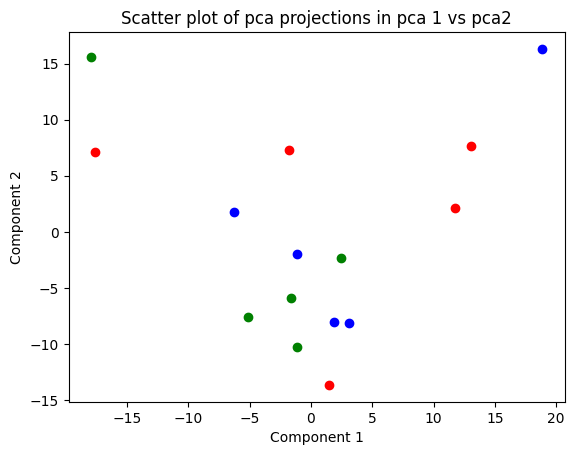

In [55]:
for i, color in enumerate(labels):
    plt.scatter(pca_extraction[i, 0], pca_extraction[i, 1], color=color) #here by use of kmeans clustering we can get which points belongs to one cluster as our data doesn't has any labels and kmeans is
plt.title('Scatter plot of pca projections in pca 1 vs pca2') #prohibitted just in order I arranged them as one color or one group.
plt.xlabel('Component 1')
plt.ylabel('Component 2')


In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=7) #default perplixit=30 must not be used as dataset is very less  and only 7 is used can use in range between (5,30) it basically adjust cluster shape.
tsne_extraction = tsne.fit_transform(X_standardized_array)

In [57]:
labels =['red', 'green', 'blue'] * 5   #as 3 categroies of movies are selected only having 3 labels.

Text(0, 0.5, 'Component 2')

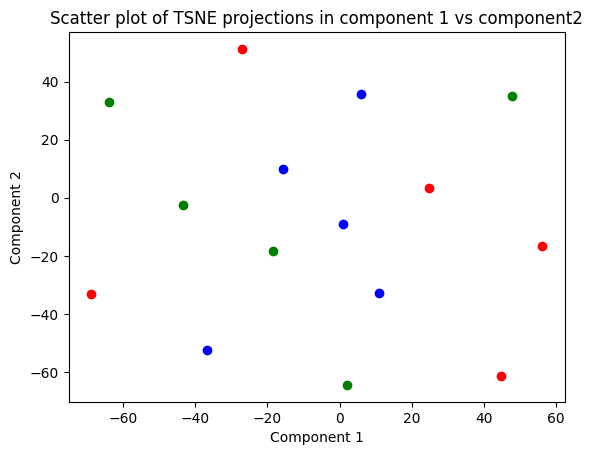

In [58]:
for i, color in enumerate(labels):
    plt.scatter(tsne_extraction[i, 0], tsne_extraction[i, 1], color=color) #segrigatingbased on above.
plt.title('Scatter plot of TSNE projections in component 1 vs component2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

## Analyzing the difference in 2 plots:
Firstly TSNE scatter plot appears to be better suited for understanding relationships of points because if you see the TSNE scatter plot. All points having similar relationship are almost clustered together. When you see PCA scatter plot as it preserves variance not similarity it lags behind in visualizing complex high dimensional data that has patterns or relationships among them. Also if you carefully observe the plot of pca you can draw 2 eigen vectors in x shape which are nothing but pca components and they pass almost in the centre of all points. But in TSNE as the shape is not linear somewhat flatted sphere we can conclude the fact that it is non linear dimensionality reduction technique.